In [1]:
import pandas as pd

data = pd.read_csv('House Price India with Notater.csv')

data

,Price,living_area_renov,Price per living_area_renov,Notater
0,4.175,1.39,300.359712,Real Estate Expert
1,10.800,3.23,334.365325,Other
2,3.700,1.62,228.395062,Real Estate Expert
3,2.630,2.15,122.325581,Other
4,3.350,1.41,237.588652,Real Estate Expert
...,...,...,...,...
95,5.250,2.10,250.000000,Real Estate Expert
96,3.270,1.50,218.000000,Real Estate Expert
97,2.950,2.59,113.899614,Other
98,4.350,2.19,198.630137,Other


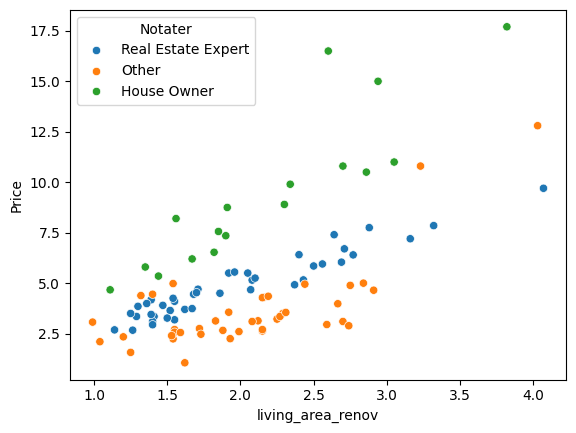

In [2]:
# plot the data color coded by notater
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=data, x='living_area_renov', y='Price', hue='Notater')
plt.show()

## Kavramlar

- **Linear Reagression**: Doğrusal regresyon, bir bağımlı değişkenin bir veya daha fazla bağımsız değişkenle olan ilişkisini modellemek için kullanılan bir regresyon analizidir.
- **Forward Pass**: İleri geçiş, bir sinir ağındaki girdilerin ağırlıklarla çarpılması ve ardından aktivasyon fonksiyonuna uygulanmasıdır.

In [165]:
import numpy as np

# seed
np.random.seed(1)
# random weight and bias
weight = np.random.rand() # 2.5
bias = np.random.rand() # -0.01

weight, bias

(0.417022004702574, 0.7203244934421581)

In [18]:
def fiyat_tahmin_et(m2):
    global weight, bias
    return m2 * weight + bias

def hata_hesapla(m2, fiyat):
    tahmin = fiyat_tahmin_et(m2)
    return fiyat - tahmin

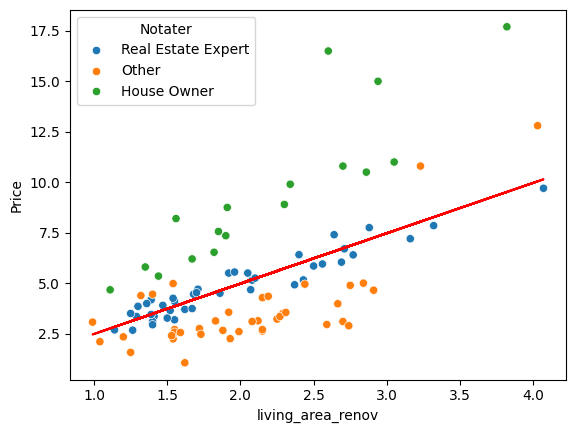

In [168]:
# draw the line with colored dots
plt.plot(data['living_area_renov'], fiyat_tahmin_et(data['living_area_renov']), color='red')
sns.scatterplot(data=data, x='living_area_renov', y='Price', hue='Notater')
plt.show()

In [22]:
data.loc[0]['living_area_renov'], data.loc[0]['Price']

(1.39, 4.175)

In [23]:

tahmin, hata

(1.299985079978736, 2.875014920021264)

In [161]:
epoch = 100
learning_rate = 1e-3

In [154]:
tahmin = fiyat_tahmin_et(data.loc[0]['living_area_renov'])
hata = hata_hesapla(data.loc[0]['living_area_renov'], data.loc[0]['Price'])

weight = weight + hata * learning_rate * data.loc[0]['living_area_renov']
bias = bias + hata * learning_rate

weight, bias

(2.2256066779578036, 2.0214645461437666)

In [163]:


for e in range(epoch):
    for i in range(len(data)):
        tahmin = fiyat_tahmin_et(data.loc[i]['living_area_renov'])
        hata = hata_hesapla(data.loc[i]['living_area_renov'], data.loc[i]['Price'])
        weight = weight + hata * learning_rate * data.loc[i]['living_area_renov']
        bias = bias + hata * learning_rate
    print(f'Epoch: {e}, Weight: {weight}, Bias: {bias}')

Epoch: 0, Weight: 1.0712010550832147, Bias: 0.9944412860478115
Epoch: 1, Weight: 1.45100666991369, Bias: 1.1441126661629624
Epoch: 2, Weight: 1.6729910456510892, Bias: 1.2222767405017227
Epoch: 3, Weight: 1.8041841117270405, Bias: 1.2593779826624356
Epoch: 4, Weight: 1.8831353082482558, Bias: 1.2729246762299729
Epoch: 5, Weight: 1.9320148108930402, Bias: 1.2729854450276896
Epoch: 6, Weight: 1.9635730020260191, Bias: 1.265350333374193
Epoch: 7, Weight: 1.9851428951366512, Bias: 1.2533487581123504
Epoch: 8, Weight: 2.000941947887785, Bias: 1.2388950213055652
Epoch: 9, Weight: 2.013395845590675, Bias: 1.2230895894570606
Epoch: 10, Weight: 2.0238998152925265, Bias: 1.2065648919766574
Epoch: 11, Weight: 2.0332564610854518, Bias: 1.1896841914706962
Epoch: 12, Weight: 2.041927565255095, Bias: 1.1726559549496889
Epoch: 13, Weight: 2.050178900312414, Bias: 1.15559962921829
Epoch: 14, Weight: 2.0581635110833396, Bias: 1.138583468583192
Epoch: 15, Weight: 2.0659696106404857, Bias: 1.1216462897183

In [167]:

for e in range(epoch):
    for i in range(len(data)):
        tahmin = fiyat_tahmin_et(data.loc[i]['living_area_renov'])
        hata = hata_hesapla(data.loc[i]['living_area_renov'], data.loc[i]['Price'])
        notater = data.loc[i]['Notater']
        notater_katsayisi = 1
        if notater == 'Real Estate Expert':
            notater_katsayisi = 5
        elif notater == 'other':
            notater_katsayisi = 2
        weight = weight + hata * learning_rate * data.loc[i]['living_area_renov'] * notater_katsayisi
        bias = bias + hata * learning_rate * notater_katsayisi
    print(f'Epoch: {e}, Weight: {weight}, Bias: {bias}')

Epoch: 0, Weight: 1.5375382732028664, Bias: 1.2044004000246418
Epoch: 1, Weight: 1.8119064765248365, Bias: 1.2924281543917684
Epoch: 2, Weight: 1.8875162200133127, Bias: 1.2880939090692922
Epoch: 3, Weight: 1.9162531766862105, Bias: 1.262631743928874
Epoch: 4, Weight: 1.9337556195798278, Bias: 1.2327417743456355
Epoch: 5, Weight: 1.9483895842999528, Bias: 1.2023304738391405
Epoch: 6, Weight: 1.96212281471835, Bias: 1.1723031219118623
Epoch: 7, Weight: 1.9754218798699001, Bias: 1.1428611476879496
Epoch: 8, Weight: 1.9884010603044935, Bias: 1.114041091046188
Epoch: 9, Weight: 2.00109188391094, Bias: 1.0858410400163774
Epoch: 10, Weight: 2.013506362399409, Bias: 1.0582502885021143
Epoch: 11, Weight: 2.025651829051381, Bias: 1.0312562891981158
Epoch: 12, Weight: 2.0375344218778904, Bias: 1.0048462799719227
Epoch: 13, Weight: 2.049159902896563, Bias: 0.9790076607220877
Epoch: 14, Weight: 2.0605338524053214, Bias: 0.9537280771945735
Epoch: 15, Weight: 2.0716617165829674, Bias: 0.928995436149